In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'D:\\_Learnings\\Career\\Share market\\FinTrade\\inside_candle'

## Initializing the required vars

In [3]:
# dir_path = os.path.dirname(os.path.realpath(__file__))
dir_path = "D:\_Learnings\Career\Share market\FinTrade\inside_candle"

# Nifty top 500
nifty_500_input_name = "nifty_500.csv"
nifty_500_input_name =  os.path.join(dir_path, "DailyHistoricalData", nifty_500_input_name)


# Nifty top 50
nifty_50_input_name = "nifty_50.csv"
nifty_50_input_name =  os.path.join(dir_path, "DailyHistoricalData", nifty_50_input_name)


# Nifty top 100
nifty_100_input_name = "nifty_100.csv"
nifty_100_input_name =  os.path.join(dir_path, "DailyHistoricalData", nifty_100_input_name)


# Nifty top mid 150
nifty_mid_150_input_name = "nifty_mid_150.csv"
nifty_mid_150_input_name =  os.path.join(dir_path, "DailyHistoricalData", nifty_mid_150_input_name)


# Nifty top small 250
nifty_small_250_input_name = "nifty_small_250.csv"
nifty_small_250_input_name =  os.path.join(dir_path, "DailyHistoricalData", nifty_small_250_input_name)


current_date_input_file = "20220627.csv"
current_date_input_file =  os.path.join(dir_path, "DailyHistoricalData", current_date_input_file)

previous_date_input_file = "20220624.csv"
previous_date_input_file =  os.path.join(dir_path, "DailyHistoricalData", previous_date_input_file)

## Reading current date and previous day input data

In [102]:
nifty_500_df = pd.read_csv(nifty_500_input_name)

nifty_50_df = pd.read_csv(nifty_50_input_name)
nifty_100_df = pd.read_csv(nifty_100_input_name)
nifty_mid_150_df = pd.read_csv(nifty_mid_150_input_name)
nifty_small_250_df = pd.read_csv(nifty_small_250_input_name)

# current_df = pd.read_csv(current_date_input_file)
# previous_df = pd.read_csv(previous_date_input_file)

# day_1 = pd.read_csv(current_date_input_file)
# day_2 = pd.read_csv(previous_date_input_file)
# day_3 = pd.read_csv(os.path.join(dir_path, "DailyHistoricalData", "20220623.csv"))
# day_4 = pd.read_csv(os.path.join(dir_path, "DailyHistoricalData", "20220622.csv"))
# day_5 = pd.read_csv(os.path.join(dir_path, "DailyHistoricalData", "20220621.csv"))
# day_6 = pd.read_csv(os.path.join(dir_path, "DailyHistoricalData", "20220620.csv"))

In [68]:
from datetime import datetime, date, timedelta
day = date.today()
count = 20
dates = []
while count > 0:
    if day.weekday() in [5,6]:
        day = day - timedelta(1)
    else:
        dates.append(day)
        day = day - timedelta(1)
        count-=1

In [75]:
historical_20days = []
for i, dt in enumerate(dates, start=1):
    d, m, y = dt.strftime("%d"),dt.strftime("%m"),dt.year
    print(d,m,y)
    historical_20days.append(pd.read_csv(os.path.join(dir_path, "DailyHistoricalData", f"{y}{m}{d}.csv")))

29 06 2022
28 06 2022
27 06 2022
24 06 2022
23 06 2022
22 06 2022
21 06 2022
20 06 2022
17 06 2022
16 06 2022
15 06 2022
14 06 2022
13 06 2022
10 06 2022
09 06 2022
08 06 2022
07 06 2022
06 06 2022
03 06 2022
02 06 2022


In [106]:
nifty_50s = nifty_50_df["Symbol"].tolist()

In [121]:
nifty = {}
for symbol in nifty_50s:
    stock = []
    for day in historical_20days:
        day = day.loc[(day['SERIES'] == 'EQ') & (day['SYMBOL'] == symbol)]
        day = day[['OPEN', 'HIGH','LOW','CLOSE','TIMESTAMP']]
        stock.append(day)
    nifty[symbol] = stock

In [110]:
import mplfinance as mpf

In [118]:
for key, value in nifty.items():
    stock = pd.concat(value[::-1],ignore_index=True)
    stock.reset_index()
    stock.TIMESTAMP = pd.DatetimeIndex(stock['TIMESTAMP'])
    stock = stock.set_index('TIMESTAMP')
    stock.index.name = 'Date'
    stock = stock.rename(columns=lambda x: x.capitalize())
    
    
    ourpath = os.path.join(dir_path, "DailyReports", f"{key}.png")
    mpf.plot(stock,type='candle',style='yahoo',title=f'{key}',savefig=ourpath)

In [112]:
import img2pdf

In [120]:
with open(os.path.join(dir_path, "DailyReports", "Report-20220629.pdf"), "wb") as f:
    f.write(img2pdf.convert([os.path.join(dir_path, "DailyReports", i) for i in os.listdir(os.path.join(dir_path, "DailyReports")) if i.endswith(".png")]))

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an a

In [77]:
SBI = []
for day in historical_20days:
    df_var = f'day_{i}'
    day = day.loc[(day['SERIES'] == 'EQ') & (day['SYMBOL'] == 'SBIN')]
    #d = eval(df_var).loc[(eval(df_var)['SERIES'] == 'EQ') & (eval(df_var)['SYMBOL'] == 'SBIN')]
    day = day[['OPEN', 'HIGH','LOW','CLOSE','TIMESTAMP']]
    SBI.append(day)

In [80]:
sbi = pd.concat(SBI[::-1],ignore_index=True)
sbi.reset_index()
sbi.TIMESTAMP = pd.DatetimeIndex(sbi['TIMESTAMP'])
sbi = sbi.set_index('TIMESTAMP')
sbi.index.name = 'Date'
sbi = sbi.rename(columns=lambda x: x.capitalize())
sbi

,Open,High,Low,Close
Date,,,,
2022-06-02,466.90,472.35,466.15,469.85
2022-06-03,473.25,475.50,463.50,464.50
2022-06-06,464.20,465.60,456.50,463.70
2022-06-07,461.85,465.95,460.50,463.40
2022-06-08,466.60,475.55,463.20,471.30
2022-06-09,468.95,470.90,462.45,466.95
2022-06-10,462.00,464.15,458.60,461.85
2022-06-13,454.00,454.05,442.10,445.85
2022-06-14,445.00,449.25,443.35,448.10


In [81]:
import mplfinance as mpf

In [101]:
ourpath = os.path.join(dir_path, "DailyHistoricalData", "sbi.png")
mpf.plot(sbi,type='candle',style='yahoo',title='SBI',savefig=ourpath)

In [95]:
print(dir(mpf))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_arg_validators', '_helpers', '_kwarg_help', '_mpf_warnings', '_mplwraps', '_panels', '_styledata', '_styles', '_utils', '_version', '_widths', 'available_styles', 'figure', 'kwarg_help', 'make_addplot', 'make_marketcolors', 'make_mpf_style', 'mplfinance', 'plot', 'plotting', 'show', 'write_style_file']


In [100]:
help(mpf.write_style_file)

Help on function write_style_file in module mplfinance._styles:

write_style_file(style, filename)



In [19]:
# current_df = current_df.rename(columns=lambda x: x.strip())
# previous_df= previous_df.rename(columns=lambda x: x.strip())
# day_1 = day_1.rename(columns=lambda x: x.strip())
# day_2 = day_2.rename(columns=lambda x: x.strip())
# day_3 = day_3.rename(columns=lambda x: x.strip())
# day_4 = day_4.rename(columns=lambda x: x.strip())
# day_5 = day_5.rename(columns=lambda x: x.strip())
# day_6 = day_5.rename(columns=lambda x: x.strip())

In [40]:
SBI = []
for i in range(1,7):
    df_var = f'day_{i}'
    d = eval(df_var).loc[(eval(df_var)['SERIES'] == 'EQ') & (eval(df_var)['SYMBOL'] == 'SBIN')]
    d = d[['OPEN', 'HIGH','LOW','CLOSE','TIMESTAMP']]
    SBI.append(d)

In [41]:
SBI

[        OPEN    HIGH     LOW  CLOSE    TIMESTAMP
 1700  459.95  464.85  458.05  461.2  27-JUN-2022,
        OPEN    HIGH    LOW   CLOSE    TIMESTAMP
 1693  455.8  460.35  453.2  454.25  24-JUN-2022,
        OPEN    HIGH    LOW  CLOSE    TIMESTAMP
 1689  449.0  456.45  446.0  451.4  23-JUN-2022,
         OPEN   HIGH     LOW   CLOSE    TIMESTAMP
 1696  448.75  451.2  444.65  447.65  22-JUN-2022,
        OPEN    HIGH    LOW   CLOSE    TIMESTAMP
 1711  439.5  454.95  437.6  450.75  21-JUN-2022,
        OPEN    HIGH    LOW   CLOSE    TIMESTAMP
 1711  439.5  454.95  437.6  450.75  21-JUN-2022]

In [25]:
i = 1
s = f'day_{i}'
eval(s).loc[(day_1['SERIES'] == 'EQ') & (day_1['SYMBOL'] == 'SBIN')]

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
1700,SBIN,EQ,459.95,464.85,458.05,461.2,461.55,454.25,9509175,4.385421e+09,27-JUN-2022,103487,INE062A01020,NaN


In [15]:
c_sbi = current_df.loc[(current_df['SERIES'] == 'EQ') & (current_df['SYMBOL'] == 'SBIN')]
p_sbi = previous_df.loc[(previous_df['SERIES'] == 'EQ') & (previous_df['SYMBOL'] == 'SBIN')]




In [16]:
c_sbi

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN,Unnamed: 13
1700,SBIN,EQ,459.95,464.85,458.05,461.2,461.55,454.25,9509175,4.385421e+09,27-JUN-2022,103487,INE062A01020,NaN


In [54]:
sbi = pd.concat(SBI[::-1],ignore_index=True)
sbi.reset_index()
sbi.TIMESTAMP = pd.DatetimeIndex(sbi['TIMESTAMP'])
sbi = sbi.set_index('TIMESTAMP')
sbi.index.name = 'Date'
sbi = sbi.rename(columns=lambda x: x.capitalize())
sbi

,Open,High,Low,Close
Date,,,,
2022-06-21,439.50,454.95,437.60,450.75
2022-06-21,439.50,454.95,437.60,450.75
2022-06-22,448.75,451.20,444.65,447.65
2022-06-23,449.00,456.45,446.00,451.40
2022-06-24,455.80,460.35,453.20,454.25
2022-06-27,459.95,464.85,458.05,461.20


In [55]:
import mplfinance as mpf

In [58]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [ ]:
# # https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh
# fplt.plot(
#             apple_df,
#             type='candle',
#             style='charles',
#             title='Apple, March - 2020',
#             ylabel='Price ($)',
#             )

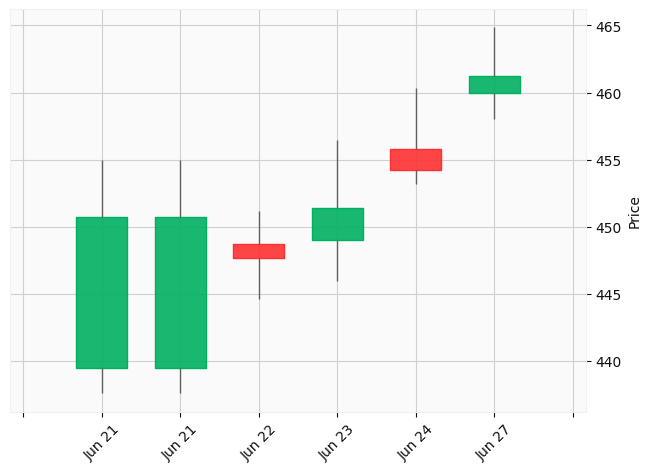

In [67]:
mpf.plot(sbi,type='candle',style='yahoo')#,style='charles')

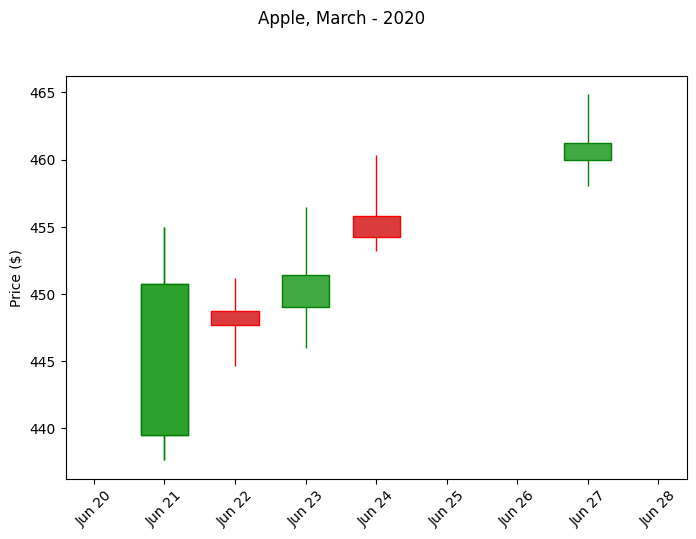

In [64]:
mc = mpf.make_marketcolors(
                            up='tab:green',down='tab:red',
                            edge={'up':'green','down':'red'},
                            wick={'up':'green','down':'red'},
                            volume='tab:green',
                           )

s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(
        sbi,
        type="candle",
        title='Apple, March - 2020',
        ylabel='Price ($)',
        figratio=(12,8),
        ylabel_lower='Shares\nTraded',
        show_nontrading=True,
        style=s
    )

In [ ]:
def isInsideCandle(O,H,L,C):
    change = O - C
    percentage_change = (abs(change/O)) * 100
    wick_change_threshold = 3 * percentage_change
    if change >= 0:
        change_H = H - C 
        change_L = abs(L - O)
        change_H = (change_H/C)*100
        change_L = (change_L/O)*100
    else:
        change_H = H - O 
        change_L = abs(L - O)
        change_H = (change_H/O)*100
        change_L = (change_L/C)*100
        
    wick_change = change_H > wick_change_threshold and change_L > wick_change_threshold
    
    
    
    if percentage_change < 0.2 and wick_change :
        return True
    return False

## Cleaning data Nifty 500

In [ ]:
# Cleaning data and saving only EQ and Nifty 500
nifty_500s = nifty_500_df["Symbol"]

current_df = current_df.loc[current_df['SERIES'] == 'EQ']
current_df= current_df.loc[current_df['SYMBOL'].isin(nifty_500s)]

previous_df = previous_df.loc[previous_df['SERIES'] == 'EQ']
previous_df = previous_df.loc[previous_df['SYMBOL'].isin(nifty_500s)]

In [ ]:
current_df['InsideCandle'] = current_df.apply(lambda row: isInsideCandle(row['OPEN'], row['HIGH'], row['LOW'], row['CLOSE']), axis=1)
trade_500_df = current_df.loc[current_df['InsideCandle'] == True]
trade_500_df = trade_500_df.reset_index()
trade_500_df.SYMBOL

## Nifty 50

In [ ]:
# Cleaning data and saving only EQ and Nifty 500
nifty_50s = nifty_50_df["Symbol"]

current_50_df= current_df.loc[current_df['SYMBOL'].isin(nifty_50s)]
previous_50_df = previous_df.loc[previous_df['SYMBOL'].isin(nifty_50s)]

In [ ]:
trade_50_df = current_50_df.loc[current_50_df['InsideCandle'] == True]
trade_50_df = trade_50_df.reset_index()
trade_50_df.SYMBOL

## Nifty 100

In [ ]:
# Cleaning data and saving only EQ and Nifty 500
nifty_100s = nifty_100_df["Symbol"]

current_100_df= current_df.loc[current_df['SYMBOL'].isin(nifty_100s)]

previous_100_df = previous_df.loc[previous_df['SYMBOL'].isin(nifty_100s)]

In [ ]:
trade_100_df = current_100_df.loc[current_100_df['InsideCandle'] == True]
trade_100_df = trade_100_df.reset_index()
trade_100_df.SYMBOL

## Nifty mid 150

In [ ]:
# Cleaning data and saving only EQ and Nifty 500
nifty_mid_150s = nifty_mid_150_df["Symbol"]

current_150_df= current_df.loc[current_df['SYMBOL'].isin(nifty_mid_150s)]

previous_150_df = previous_df.loc[previous_df['SYMBOL'].isin(nifty_mid_150s)]

In [ ]:
trade_150_df = current_150_df.loc[current_150_df['InsideCandle'] == True]
trade_150_df = trade_150_df.reset_index()
trade_150_df.SYMBOL

## Nifty small 250

In [ ]:
# Cleaning data and saving only EQ and Nifty 500
nifty_small_250s = nifty_small_250_df["Symbol"]

current_250_df= current_df.loc[current_df['SYMBOL'].isin(nifty_small_250s)]

previous_250_df = previous_df.loc[previous_df['SYMBOL'].isin(nifty_small_250s)]

In [ ]:
trade_250_df = current_250_df.loc[current_250_df['InsideCandle'] == True]
trade_250_df = trade_250_df.reset_index()
trade_250_df.SYMBOL